# Full Solution-2

In [45]:
# Note: The data below is the one you retrieved in previous part and
#it is used here to run the rest of the analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


risk_free = pd.read_csv('risk_free.csv')
risk_free = risk_free.set_index('Unnamed: 0')
risk_free.index.names = ['Date']
stocks = pd.read_csv('stocks.csv')
stocks = stocks.set_index('timestamp')
ind =  pd.read_csv('ind.csv')
ind = ind.set_index('Unnamed: 0')
ind.index.names = ['Date']
inf = pd.read_csv('inf.csv')
inf = inf.set_index('Unnamed: 0')
inf.index.names = ['Date']

In what follows, as suggested, you need to compute inflation rate, which is nothing but the percentage change of it. Here is how you can do that:

In [46]:
inf_rate = inf.pct_change().dropna()

In [47]:
risk_free = risk_free / 12

As you can notice, there is a level difference between stock prices, inflation and industrial production index. To deal with the scaling issue, taking logarithm makes sense:

In [48]:
log_ind = np.log(ind)

In [49]:
returns = stocks.pct_change()
returns.dropna(inplace=True)
returns.head()

,TWTR,FB,SPY
timestamp,,,
2015-02-27,0.281108,0.040311,0.056205
2015-03-31,0.041597,0.041092,-0.020080
2015-04-30,-0.222045,-0.041902,0.009834
2015-05-29,-0.058778,0.005332,0.012856
2015-06-30,-0.012272,0.083028,-0.024865


To be consistent, you need to drop the last two months (April and May) of stock prices and the last month from inflation rate, and industrial production as industrial production index and inflation rate do not have observation at this date.

In [50]:
print(len(returns))
print(len(log_ind))
print(len(inf_rate))
print(len(risk_free))

75
77
76
77


In [51]:
log_ind = log_ind.iloc[2:]
inf_rate = inf_rate.iloc[:-1]
risk_free = risk_free.iloc[1:-1]

In [52]:
inf_rate.index = returns.index
log_ind.index = returns.index
risk_free.index = returns.index

After completing the data collection and cleaning process and now we should combine all these variables into single data frame along the columns. Pandas' `concat` function does this for us and create a single data frame. But there is one more step to go. The indeces of the data should be matched properly. The following code does this for us:

In [53]:
apt_df = pd.concat([returns,inf_rate,log_ind,risk_free],axis=1)
apt_df.columns = ['TWTR', 'FB', 'SPY', 'inf_rate', 'log_ind', 'risk_free']
apt_df

,TWTR,FB,SPY,inf_rate,log_ind,risk_free
timestamp,,,,,,
2015-02-27,0.281108,0.040311,0.056205,0.003891,4.623938,0.018333
2015-03-31,0.041597,0.041092,-0.020080,0.004887,4.617947,0.020833
2015-04-30,-0.222045,-0.041902,0.009834,0.002175,4.613543,0.019167
2015-05-29,-0.058778,0.005332,0.012856,0.004177,4.610220,0.020000
2015-06-30,-0.012272,0.083028,-0.024865,0.003744,4.616932,0.023333
...,...,...,...,...,...,...
2020-12-31,0.164266,-0.013756,0.032647,0.001039,4.599229,0.008333
2021-01-29,-0.066851,-0.054291,-0.010190,0.004240,4.568216,0.008333
2021-02-26,0.525035,-0.002748,0.027806,0.005315,4.594514,0.005833


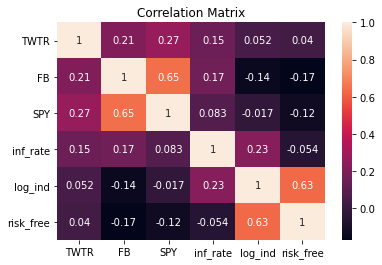

In [54]:
heat_corr = apt_df.corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

As expected, stocks and market index are highly correlated and we observe the similar phenemon among macro variables as they show high correlation, too.

In [55]:
cols = returns.columns
for i in cols:
    returns["excess_return_"+str(i)] = returns[i] - risk_free['0']

In [56]:
returns.head()

,TWTR,FB,SPY,excess_return_TWTR,excess_return_FB,excess_return_SPY
timestamp,,,,,,
2015-02-27,0.281108,0.040311,0.056205,0.262775,0.021978,0.037871
2015-03-31,0.041597,0.041092,-0.020080,0.020764,0.020258,-0.040913
2015-04-30,-0.222045,-0.041902,0.009834,-0.241211,-0.061069,-0.009333
2015-05-29,-0.058778,0.005332,0.012856,-0.078778,-0.014668,-0.007144
2015-06-30,-0.012272,0.083028,-0.024865,-0.035605,0.059695,-0.048198


In [57]:
df_merged = pd.concat([returns.iloc[:, 3:], apt_df.loc[:,['inf_rate', 'log_ind']]],
                      axis=1, ignore_index=True)
df_merged.rename(columns={0:'excess_return_TWTR',
                        1:'excess_return_FB',
                        2:'excess_return_SPY',
                        3:'inf_rate',
                        4:'log_ind'}, inplace=True)

In [58]:
df_merged.head()

,excess_return_TWTR,excess_return_FB,excess_return_SPY,inf_rate,log_ind
timestamp,,,,,
2015-02-27,0.262775,0.021978,0.037871,0.003891,4.623938
2015-03-31,0.020764,0.020258,-0.040913,0.004887,4.617947
2015-04-30,-0.241211,-0.061069,-0.009333,0.002175,4.613543
2015-05-29,-0.078778,-0.014668,-0.007144,0.004177,4.610220
2015-06-30,-0.035605,0.059695,-0.048198,0.003744,4.616932
